# Assignment One
---
Oisín Morrison - 19/09/19 - Assignment_1.ipynb

In [17]:
#standard imports for data science with python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)

## Task 1
The Rayleigh-Jeans law for the spectrum of a Blackbody is
$$\operatorname{U}(\nu, T) = \frac{8\pi\nu^2}{c^3}kT$$
where $k = 1.38 \times10^{-23}$ $\left.\mathrm{J}\middle/\mathrm{K}\right.$ and $c = 3.0 \times10^{8}$ $\left.\mathrm{m}\middle/\mathrm{s}\right.$.

Write a program to print the value of U(ν, T) for a user-inputted frequency
and temperature. Test with $\nu = 10^{12}$ and $T = 2000$ $\mathrm{K}$ and a hand calculation.

So, here's what I'm going to do:
- I'll create a function u(v,t) that takes two number inputs for frequency and temperature in SI units.
- I'll have the function return the value of the Rayleigh-Jeans law.
- I'll test out the function for the given test values.
- I'll do the calculation out by hand to verify that the function is returning the correct value.

In [18]:
#This is just that exact formula above in one messy block of code.
#I could separate out the constants, but I have to check my 
#output for this task anyway so there would be very little benefit
#from that in terms of making sure my output is correct. It is 
#also exceedingly obvious what I am doing so I don't need to 
#clarify this bit of code.

def u(v,t):
    '''This function return the value of the Raleigh-Jeans law formula given two inputs v and t, the frequency of the light and the temperature of the blackbody in SI units'''
    #I haven't defined the constants separately since we already know the formula
    return (8*np.pi*(1.38*10**(-23))*t*v**2*(3*10**8)**(-3))

In [19]:
#Here's my function's output for the given test values.
print("U(10^12, 2000) = {} Ks/m^3".format(u(10**12,2000)))

U(10^12, 2000) = 2.5691246589356524e-20 Ks/m^3


Now let us see how a hand calculation compares to this.
<br>
We have:
$$\operatorname{U}(\nu, T) = \frac{8\pi\nu^2}{c^3}kT$$
where $k = 1.38 \times10^{-23}$ $\left.\mathrm{J}\middle/\mathrm{K}\right.$ and $c = 3.0 \times10^{8}$ $\left.\mathrm{m}\middle/\mathrm{s}\right.$.
<br>
So,
$$\operatorname{U}(\nu, T) = \frac{8\pi\nu^2}{c^3}kT = \frac{8\pi\nu^2}{\left(3 \times10^{8}\right)^3} \times 1.38 \times10^{-23} \times T \approx 4.088888888888888 \times10^{48} \times \pi\nu^2T$$
<br>
We wish to find $$\operatorname{U}(\nu=10^{12}, T=2000)$$
<br>
Plugging in our values,
$$\operatorname{U}(\nu=10^{12}, T=2000)\approx 4.088888888888888 \times10^{48} \times \pi \times \left(10^{12}\right)^2 \times 2000$$
$$\approx 8.177777777777776 \times10^{-21} \pi \approx 2.5691246589356524 \times10^{-20}$$
<br>
This is indeed the value our program returned. On a side note, the units for $\operatorname{U}(\nu, T)$ are Kelvin-seconds per metre cubed.

## Task 2
Develop your program to plot the Rayleigh-Jeans law over a range of
frequecies to show that this leads to the Ultraviolet Catastrophe. A Kelvin temperature
of $2000$ $\mathrm{K}$ and frequency range between $10^{11}$ and $10^{15}$ $\mathrm{Hz}$ should give a good illustrative plot, but
you can choose other values. Note that you will need log scales on the plot.

So, here's what I'm going to do:
- I'll create a numpy linspace array for my frequency values and store it as a variable V. I'll use the suggested frequency range.
- I'll plot u(V, 2000) against V i.e. plot the output of my created u(v,t) function for a temperature of 2000K in the suggested frequency range against the frequency.
- I'll then format this plot appropriately, adding log scales, labels etc.

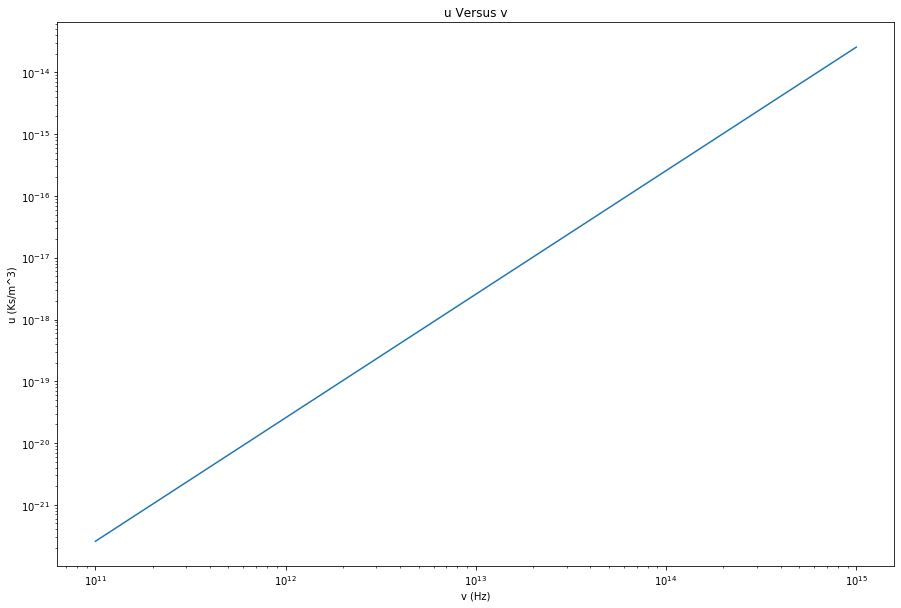

In [20]:
#I'm just going with the suggested frequency range, and taking 100 values.
V=np.linspace(10**11,10**15,100)
#initialising my graph as standard, and making the figure bigger
fig,ax=plt.subplots(figsize=(15,10))
#plotting and making use of np.array()s properties
ax.plot(V,u(V,2000))
#labelling
ax.set(xlabel='v (Hz)', ylabel='u (Ks/m^3)')
ax.set_title("u Versus v")
#making the scale a log scale as requested
ax.set_yscale('log')
ax.set_xscale('log')

#The plot looks fine and illustrative to me so I didn't bother doing any extra formatting on the axes.
#The range of x and y values plotted looks good.

## Task 3
Add a plot of Planck’s function for a few temperatures between $2000$ and
$6000$ $\mathrm{K}$, using the same frequency range as above and keeping the Rayleigh-Jeans
law plot. You can change the line formats (e.g. colours, dashed) to make the plot
look good.

In PH333 we will see that Planck came up with a completely different formula:
$$\operatorname{U}(\nu, T) = \frac{8\pi h \nu^3}{c^3} \frac{1}{\operatorname{exp}\left({\frac{h\nu}{kT}}\right)-1}$$
<br> 
with a new constant, $h = 6.63 \times10^{−34}$ $\mathrm{J}\!\cdot\!\mathrm{s}$.

So, here's what I'm going to do:
- I'll create a function planck(v,t) that takes two number inputs for frequency and temperature in SI units.
- I'll have the function return the value of Planck's function above.
- I'll reuse my numpy array V of frequency values.
- I'll do two plots, one with log scale and one with linear scale. For both of these I will plot the same thing but I'll format them differently.
- I'll replot u(V, 2000) against V i.e. plot the output of my created u(v,t) function for a temperature of 2000K in the suggested frequency range against the frequency.
- I'll then plot V against planck(V, t) on the same plot for temperatures of 2000, 3000, 4000, 5000 and 6000K i.e. plot the outputs of my created planck(v,t) function for the aforementioned temperatures  in the suggested frequency range against the frequency.
- I'll then format these plots appropriately, adding log scales, labels etc. where appropriate.

In [21]:
#Again, this is super obvious as to what I am doing
#I'm just creating the function detailed in the 
#task description in python. I tested a few values 
#to make sure it works.

def planck(v,t):
    '''This function return the value of Planck's formula given two inputs v and t, the frequency of the light and the temperature of the blackbody in SI units'''
    #I haven't defined the constants seperately since we already know the formula
    return (8*6.63*10**(-34)*np.pi*v**3*(3*10**8)**(-3))*1/(np.exp((((6.63*10**(-34))*v))/((1.38*10**(-23))*t))-1)

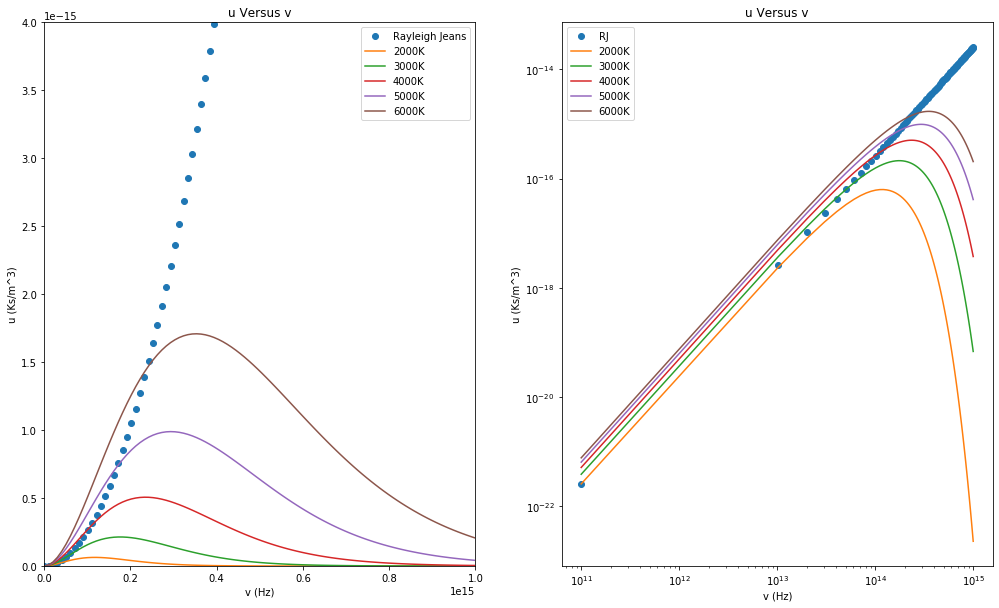

In [22]:
#initialising my graphs as standard, and making the figure bigger
fig, ax = plt.subplots(1,2,figsize=(17,10))

#replotting the Raleigh-Jeans plot I already have as asked to do
#Doing this for both plots
ax[0].plot(V,u(V,2000), 'o',label="Rayleigh Jeans")
ax[0].set(xlabel='v (Hz)', ylabel='u (Ks/m^3)')
ax[0].set_title("u Versus v")
ax[1].plot(V,u(V,2000), 'o',label="RJ")
ax[1].set(xlabel='v (Hz)', ylabel='u (Ks/m^3)')
ax[1].set_title("u Versus v")

#Setting a ylimit so we can still see the Planck formula 
#graphs too as opposed to the Raleigh Jeans one dominating the graph entirely
ax[0].set_ylim([0, 4*10**(-15)])
ax[0].set_xlim([0,10**15])


#Making the second graph a log one
ax[1].set_yscale('log')
ax[1].set_xscale('log')

for i in range(2,7):
    #Plotting various Planck formulae outputs for both graphs.
    #Doing this in the same loop since it is more efficient.
    #Don't need to change colours or anything since this is done automatically for us.
    ax[0].plot(V,planck(V,i*1000), '-', label="{}K".format(i*1000))
    ax[1].plot(V,planck(V,i*1000), '-', label="{}K".format(i*1000))
    
#Show labels
ax[0].legend()    
ax[1].legend()

#The plot looks fine and illustrative to me so I didn't bother doing any extra formatting on the axes.
#The range of x and y values plotted looks good.

One thing to note here is that as illustrated in the first graph, we will need to extend our range of frequencies when we wish to find the area under the curve, since our current range is missing an appreciable amount of area.

## Task 4
Develop your program to find the peak of the Planck function for each
temperature. From this information, evaluate the constant in Wien’s displacement
law, which gives the peak of the Planck function in wavelength coordinates versus
temperature:
$$\lambda_{peak}T = Constant$$
Print the value of the constant you find to the screen.

So, here's what I'm going to do:
- I'll reuse my numpy array V of frequency values.
- I'll create a pandas DataFrame with the frequencies V in a column.
- I'll add columns to this DataFrame for the output of my planck(v,t) function for each frequency for temperatures of 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500 and 6000K.
- I'll then manipulate this DataFrame to give me the peak frequency, wavelength and planck function value for each of these temperatures.
- I'll then plot the temperature against 1 over the peak wavelength with my values for my 9 temperatures.
- I'll then format this plot appropriately, adding labels etc. where appropriate.
- From this plot I will obtain Wien's displacement constant from the slope, and its uncertainty.
- I will then compare my value to the known value (and I'll print my value to the screen as asked).

In [7]:
#creating an array to store the temperatures for which I'm finding the peak wavelength.
temps=np.array([])

#making a dataframe and creating a column with my frequency values
#from part 3 I know that the peak is contained in these frequency values.
results=pd.DataFrame()
results["v"]=V

#Doing nine temperatures in the same range we plotted in Task3. 
#this should be enough to illustrate the relationship, and 
#ensures that my array V contains the peak
for i in range(4,13):
    #adding a column with the output of my planck function for each temperature
    results["planck at T = {}".format(i*500)]=planck(V,i*500)
    #adding each temperature to my temperature array
    temps=np.append(temps,i*500)
    #Creating a column for each temperature with all nans except for the peak value of the Planck function
    results[i*500]=np.where(results["planck at T = {}".format(i*500)]==(max(results["planck at T = {}".format(i*500)])),results["planck at T = {}".format(i*500)],np.nan)

#creating my dictionary to aggregate on my groupby with
dic={}
for temp in temps:
    dic[temp]='max'

#Now getting my DataFrame to just show the peak frequency and temperatures (and peak value)
results=results.groupby("v").agg(dic)
results=results.dropna(0,"all") #removing rows we don't want
results=results.reset_index() #unindex the frequency column
results=pd.melt(results,"v",temps) #reshaping DataFrame to better format
results=results.dropna(0) #removing rows we don't want
results=results.drop_duplicates(subset=None, keep="first", inplace=False) #get rid of duplicates
results=results.sort_values('variable',0,True) #put them in order
results=results.rename(columns={"variable":"T", "value":'Peak'}) #rename for clarity

#Found out I could have used np.argmax instead of using pandas after I had done this...
#Both give the same output anyhow, but I definitely did this the harder way.

#proof it works
results

,v,T,Peak
0,1.213000e+14,2000,6.320337e-17
10,1.516000e+14,2500,1.234457e-16
20,1.718000e+14,3000,2.134232e-16
30,2.021000e+14,3500,3.390517e-16
40,2.324000e+14,4000,5.062116e-16
50,2.627000e+14,4500,7.208286e-16
60,2.930000e+14,5000,9.888285e-16
70,3.233000e+14,5500,1.316137e-15
80,3.536000e+14,6000,1.708679e-15


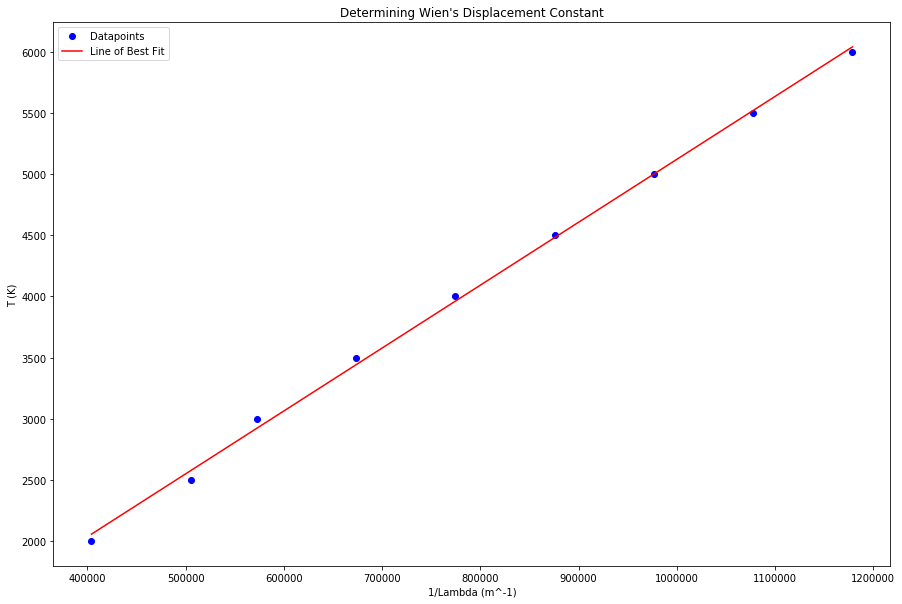

In [8]:
#initialising my graph as standard, and making the figure bigger
fig,ax=plt.subplots(figsize=(15,10))
#labelling
ax.set(xlabel="1/Lambda (m^-1)", ylabel='T (K)')
ax.set_title("Determining Wien's Displacement Constant")
#plot 1/lambda versus temperature
ax.plot(results['v']/(3*10**8), results["T"], 'bo', label='Datapoints')

#finding line of best fit to determine if we do 
#indeed have direct proportionality as asked to examine
m, cov=np.polyfit(list(results['v']/(3*10**8)), list(results["T"]), 1, cov=True)
#plot line of best fit
ax.plot(results['v']/(3*10**8),m[1]+m[0]*results['v']/(3*10**8), 'r-', label='Line of Best Fit')

ax.legend()

#The plot looks fine and illustrative to me so I didn't bother doing any extra formatting on the axes.
#The range of x and y values plotted looks good.

In [9]:
#Printing data about graph to screen.
print("Slope of {0:.6e} ± {1:.0e} m K".format(m[0],cov[0][0]))
print("Intercept of {0} ± {1} K".format(m[1],cov[1][1]))

Slope of 5.143186e-03 ± 6e-09 m K
Intercept of -22.733078467986772 ± 3776.5497870300046 K


In [10]:
print("Forcing the lines to pass through the origin gives a slope of {:.6e} m K".format(np.linalg.lstsq(np.asarray(results['v']/(3*10**8)).reshape(-1,1), list(results["T"]))[0][0]))

Forcing the lines to pass through the origin gives a slope of 5.116831e-03 m K


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


So we have that our graph of $T$ versus $\frac{1}{\lambda}$ has a slope of $m \pm \Delta m \approx 5143186 \times10^{-9} \pm 6 \times10^{-9} $ $\mathrm{m}\!\cdot\!\mathrm{K}$
and an intercept of $y \pm \Delta y \approx -22.733078467986772 \pm 3776.5497870300046 \approx 0 \pm 4000$ $\mathrm{K}$.
<br>
<br>
So, we see that my results do agree with the hypothesis that $T$ and $\frac{1}{\lambda}$ are directly proportional. We obtain that $T=m \frac{1}{\lambda}$ or $T\lambda = m$. This shows that $T\lambda$ is indeed a constant. 
<br>
We should find thus that the slope should be equal to Wien's displacement constant $b \approx 2.897771955 \times10^{-3}$ $\mathrm{m}\!\cdot\!\mathrm{K}$. Unfortunately these two values do not in fact agree since $2.897771955 \times10^{-3} \notin \left[5143186 \times10^{-9} - 6 \times10^{-9} , \textrm{ } 5143186 \times10^{-9} + 6 \times10^{-9} \right]$. We have a percentage error of $77 \textrm{%}$, which is quite large. Nonetheless, we have indeed supported the claim that $T\lambda_{peak}$ is indeed a constant, which is what we asked to do.

## Task 5
Finally, carry out a numerical integration of the Planck function for a
few temperatures to verify that the area under the curve is proportional to $T^4$ as
in the Stefan-Boltzmann law.

So, here's what I'm going to do:
- I'll create a new, larger range of frequency values V.
- I'll find the corresponding values of my planck(v,t) function for each of those frequencies for temperatures of 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500 and 6000K.
- I will then numerically find the area enclosed by these curves. To do so, for each temperature I will execute and compare three different techniques. I shall employ the np.trapz() function to see a trapezoidal rule implementation, and scipy.integrate.simps() to see a Simpson's rule implementation. Then I shall finally compare these to my own less sophisticated technique which will be a left Riemann summation for the rectangular rule for integration. To achieve this, I shall find the interval width I have and shall then sum up the value of my planck(v,t) function multiplied by this interval width for each point I have. This will provide me with a reasonable estimate for the area under the curve.
- I shall then plot three seperate graphs (one for each technique) of the areas under the curves against the temperature to the fourth power.
- I shall comment on the graphs and on the effectiveness of the integration techniques.

In [11]:
#as mentionned before, I need to take a larger range
#of frequencies to get a better area estimate. I also
#increased the amount of points for further accuracy.
V=np.linspace(10**11,10**20,500)

#Initialising some arrays.

#This will hold the temperatures we are using
Temps_to_the_4=np.array([])
#This will hold the areas obtained from np.trapz, a trapezoidal rule integration
Areas=np.array([])
#This will hold the areas obtained from scipy.integrate.simps, a Simpson's rule integration
Areas1=np.array([])
#This will hold the areas obtained from my own implementation of rectangular rule integration
Areas2=np.array([])

#Taking 9 temperatures and finding the areas for each
for i in range(4,13):
    #finding areas with np.trapz
    Areas=np.append(Areas,np.trapz(planck(V,i*500),V))
    #finidng areas with scipy.integrate.simps
    Areas1=np.append(Areas1,scipy.integrate.simps(planck(V,i*500),V))
    #sum up all the function values * interval widths to give total area approximation
    #interval width is just (max freq - min freq)/number of intervals
    Areas2=np.append(Areas2,np.sum(planck(V,i*500)*((10**20-10**11)/500)))
    #make temperature array
    Temps_to_the_4=np.append(Temps_to_the_4,(i*500)**4)

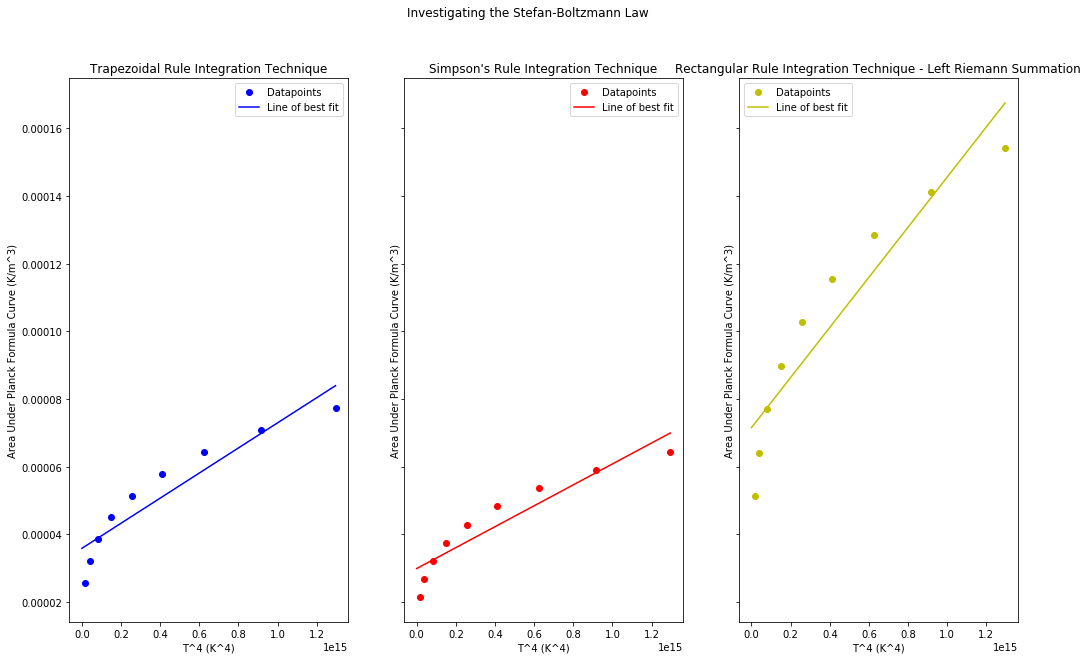

In [12]:
#getting a linspace array of temperatures^4 to plot line of best fits
t4=np.linspace(0,max(Temps_to_the_4))

#initialisng three seperate graphs for my seperate integration methods
fig, ax = plt.subplots(1,3, sharey=True, sharex=True, figsize=(17,10))

#Set master title
fig.suptitle("Investigating the Stefan-Boltzmann Law")

#labelling
ax[0].set_title("Trapezoidal Rule Integration Technique")
ax[0].set(xlabel="T^4 (K^4)", ylabel='Area Under Planck Formula Curve (K/m^3)')
#plot datapoints
ax[0].plot(Temps_to_the_4, Areas, 'bo', label='Datapoints')
#find and plot line of best fit
m1, cov1=np.polyfit(list(Temps_to_the_4), list(Areas), 1, cov=True)
ax[0].plot(t4, m1[0]*t4+m1[1], 'b-', label='Line of best fit')
#show labels
ax[0].legend()

#labelling
ax[1].set_title("Simpson's Rule Integration Technique")
ax[1].set(xlabel="T^4 (K^4)", ylabel='Area Under Planck Formula Curve (K/m^3)')
#plot datapoints
ax[1].plot(Temps_to_the_4, Areas1, 'ro', label='Datapoints')
#find and plot line of best fit
m2, cov2=np.polyfit(list(Temps_to_the_4), list(Areas1), 1, cov=True)
ax[1].plot(t4, m2[0]*t4+m2[1], 'r-', label='Line of best fit')
#show labels
ax[1].legend()

#labelling
ax[2].set_title("Rectangular Rule Integration Technique - Left Riemann Summation")
ax[2].set(xlabel="T^4 (K^4)", ylabel='Area Under Planck Formula Curve (K/m^3)')
#plot datapoints
ax[2].plot(Temps_to_the_4, Areas2, 'yo', label='Datapoints')
#find and plot line of best fit
m3, cov3=np.polyfit(list(Temps_to_the_4), list(Areas2), 1, cov=True)
ax[2].plot(t4, m3[0]*t4+m3[1], 'y-', label='Line of best fit')
#show labels
ax[2].legend()

#The plot looks fine and illustrative to me so I didn't bother doing any extra formatting on the axes.
#The range of x and y values plotted looks good.

In [13]:
print("These graphs have slopes of {0}, {1} and {2}, respectively.".format(m1[0], m2[0], m3[0]))
print("These graphs have intercepts of {0}, {1} and {2}, respectively.".format(m1[1], m2[1], m3[1]))

These graphs have slopes of 3.71065369862621e-20, 3.092211415521843e-20 and 7.40646478245792e-20, respectively.
These graphs have intercepts of 3.583579192250873e-05, 2.9863159935423946e-05 and 7.152824067732746e-05, respectively.


We see from the extremely similar slopes and y-intercepts that the methods of integration all give very similar answers. In any case, we see that in all three graphs we have a definitely linear relationship between the Area under our Planck curve and the temperature to the fourth power. This verifies that the area under the curve is proportional to $T^4$  as in the Stefan-Boltzmann law, which is precisely what we were asked to show.

We also note that the Simpson's rule integration and trapezoidal rule integration techniques give very similar results and that my simple rectangular rule technique is not as close as they are. We also see that graphs obtained from Simpson's rule and trapezoidal rule integrations are also more linear looking. This shows that we would indeed be better off using a more sophisticated technique than rectangular rule for out integration. Nonetheless we can draw the appropriate conclusion for each of our graphs.